In [ ]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from google.colab import files
from sklearn.preprocessing import LabelEncoder

## **Read File**

In [ ]:
url = 'https://github.com/iMnuelll/Bangkit_Capstone/raw/main/Preprocessing/Gform_update250524_1946.csv'
df = pd.read_csv(url, sep='|')

## **Fungsi Visualisasi Data**

In [ ]:
def scatterPlot(columnName, describe='mean'):
    mean_value = columnName.mean()
    median_value = columnName.median()

    plt.figure(figsize=(10, 5))
    plt.scatter(df.index, columnName)
    if describe == 'mean' :
      plt.axhline(mean_value, color='red', linestyle='--', label=f'Mean ({mean_value:.2f})')
    elif describe == 'median' :
      plt.axhline(median_value, color='red', linestyle='--', label=f'Median ({median_value:.2f})')
    plt.title(f'Scatter Plot of {columnName.name}')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

## **Ganti Nama Kolom**

In [ ]:
df.dtypes

Jenis Kelamin:                                                                                                                                                                                                                               object
Umur: \n(Petunjuk: 17 tahun ? 17)                                                                                                                                                                                                             int64
Pekerjaan:                                                                                                                                                                                                                                   object
Apa jenis tugas yang biasanya Anda kerjakan?                                                                                                                                                                                                 object
Berapa hari yang dihabis

In [ ]:
df = df.rename(columns={'Jenis Kelamin:' : 'gender', 'Umur: \n(Petunjuk: 17 tahun ? 17)' : 'age',
                   'Pekerjaan:' : 'job', 'Apa jenis tugas yang biasanya Anda kerjakan?' : 'task',
                   'Berapa hari yang dihabiskan untuk melakukan pekerjaan/kegiatan utama dalam seminggu?' : 'work_days',
                   'Bagaimana Anda menilai tingkat kesulitan tugas yang biasanya Anda kerjakan?' : 'difficulty',
                   'Berapa rata-rata waktu yang Anda habiskan untuk bekerja/mengerjakan tugas?\n(Petunjuk: Jawab dengan angka saja, dalam jam. Contoh: 6 jam ? 6, atau 7 jam 30 menit ? 7.5) ' : 'average_work_hour',
                   'Berapa rata-rata waktu istirahat Anda di sela-sela bekerja/mengerjakan tugas dalam sehari? (Istirahat selain tidur)\n(Petunjuk: Jawab dengan angka saja, dalam jam. Contoh: 1 jam ? 1, atau 3 jam 15 menit ? 3.25, atau 45 menit ? 0.75)' : 'average_rest',
                   'Apa saja jenis gangguan yang Anda alami saat bekerja atau menyelesaikan tugas?' : 'distraction',
                   'Bagaimana perasaan atau mood sebelum menyelesaikan tugas?' : 'mood_before_work',
                   'Bagaimana perasaan atau mood setelah menyelesaikan tugas?' : 'mood_after_work',
                   'Berapa lama batas pengerjaan (deadline) tugas yang biasa Anda kerjakan?' : 'deadline',
                   'Biasanya seberapa penting pekerjaan atau tugas yang Anda kerjakan dalam mencapai tujuan Anda?' : 'importance',
                   'Berapa rata-rata waktu yang Anda habiskan untuk tidur dalam sehari? \n(Petunjuk: Jawab dengan angka saja, dalam jam. Contoh: 1 jam ? 1, atau 3 jam 30 menit ? 3.5)' : 'sleep_average',
                   'Kalau menurut Anda, kapan Anda merasa paling produktif dalam sehari?' : 'productive_time',
                   'Biasanya seberapa mendesak pekerjaan atau tugas yang harus Anda diselesaikan?' : 'urgency'
                    })

In [ ]:
df.head(5)

,gender,age,job,task,work_days,difficulty,average_work_hour,average_rest,distraction,mood_before_work,mood_after_work,deadline,importance,sleep_average,productive_time,urgency
0,Perempuan,21,Siswa/Mahasiswa,Penelitian,4 - 6 hari,4,10,2,Gangguan dari lingkungan sekitar (kebisingan),Semangat,Lega,1 hingga 2 minggu,4,5 jam,NaN,NaN
1,Laki-laki,21,Pegawai/Pekerja kantoran,Komunikasi,5 - 7 hari,2,15,30,"Gangguan dari internal (Kelelahan, lapar, keha...",Semangat,Puas,Kurang dari 1 minggu,5,5 jam,NaN,NaN
2,Laki-laki,20,Siswa/Mahasiswa,Kreatif,4 - 6 hari,4,7,10,Gangguan dari perangkat elektronik (notifikasi...,Malas,Lega,Kurang dari 1 minggu,5,4 jam,NaN,NaN
3,Laki-laki,21,Pegawai/Pekerja kantoran,Akademik,4 - 6 hari,3,2,60,Gangguan dari perangkat elektronik (notifikasi...,Cemas,Lega,Kurang dari 1 minggu,2,8 jam,NaN,NaN
4,Laki-laki,21,Siswa/Mahasiswa,Analitis,2 - 4 hari,3,4,30,Gangguan dari perangkat elektronik (notifikasi...,Semangat,Lega,Kurang dari 1 minggu,2,5 jam,NaN,NaN


## **Encoded Data**

In [ ]:
encoding = {"gender" : {"Laki-laki" : 0, "Perempuan": 1},
            "job" : {"Pegawai/Pekerja kantoran" : 0, "Siswa/Mahasiswa" : 1, "Pengusaha" : 2, "Buruh" : 4, "Dosen" : 5},
            "task" : {"Kreatif (Desain grafis, Penulis, dll)" : 0, "Kreatif" : 0,
                      "Analitis (Analisis data, Analisis keuangan, dll)" : 1, "Analitis" : 1, "Proyek dan koding" : 1,
                      "Fisik (Pemain sepak bola, Pemain voli, Buruh, dll)" : 2, "Fisik" : 2,
                      "Administratif (Admin, Sekretaris, dll)" : 3, "Administratif" : 3,
                      "Komunikasi (Jurnalis, Penyiar, Public relation, dll)" : 4, "Komunikasi" : 4,
                      "Penelitian (Peneliti lingkungan, Peneliti budaya, Data scientist, dll)" : 5, "Penelitian" : 5,
                      "Akademik (Dosen, Guru, Siswa, Mahasiswa, dll)" : 6, "Akademik" : 6},
            "mood_before_work" : {"Semangat" : 0, "Cemas" : 1, "Malas" : 2},
            "mood_after_work" : {"Puas" : 0, "Lega" : 1, "Kecewa" : 2},
            "deadline" : {"Kurang dari 3 hari" : 0, "3 hari hingga 1 minggu" : 1, "Kurang dari 1 minggu" : 1,  "1 hingga 2 minggu" : 2, "2 minggu hingga 1 bulan" : 3,
                          "Lebih dari 1 bulan" : 4},
            "productive_time" : {"09:00 - 14:00" : 0, "09:00 - 12:00" : 0, "10:00 - 14:00" : 1, "13:00 - 17:00" : 2, "15:00 - 19:00" : 3, "23:00 - 06:00" : 0}}
df.replace(encoding, inplace=True)

## **Mengganti nilai Null**

In [ ]:
df.isnull().sum()

gender                0
age                   0
job                   0
task                  0
work_days             0
difficulty            0
average_work_hour     0
average_rest          0
distraction           0
mood_before_work      0
mood_after_work       0
deadline              0
importance            0
sleep_average         0
productive_time      19
urgency              21
dtype: int64

In [ ]:
productive_time_value = (0, 3)
urgency_value = (1, 5)
def replace_null_value (columnName, value) :
  return columnName.apply(lambda x: random.randint(value[0], value[1]) if pd.isnull(x) else x)

In [ ]:
df['productive_time'] = replace_null_value(df['productive_time'], productive_time_value)
df['urgency'] = replace_null_value(df['urgency'], urgency_value)

In [ ]:
df.isnull().sum()

gender               0
age                  0
job                  0
task                 0
work_days            0
difficulty           0
average_work_hour    0
average_rest         0
distraction          0
mood_before_work     0
mood_after_work      0
deadline             0
importance           0
sleep_average        0
productive_time      0
urgency              0
dtype: int64

## **Melakukan regexp pada kolom work_days dan sleep_average**

In [ ]:
df['sleep_average'] = df['sleep_average'].astype(str)
df['work_days'] = df['work_days'].str.extract(r'(\d+)\s*hari$')
df['sleep_average'] = df['sleep_average'].str.extract(r'(\d+)').astype(float)

## **One Hot Encoded distraction**

In [ ]:
encoded_df = df['distraction'].str.get_dummies(sep=', ')
df = pd.concat([df, encoded_df], axis=1)
df = df.drop(columns=['distraction'])
df = df.T.drop_duplicates().T

In [ ]:
df[df.columns.difference(['name'])] = df[df.columns.difference(['name'])].astype(float)
df[df.columns.difference(['average_work_hour', 'average_rest', 'sleep_average', 'name'])] = df[df.columns.difference(['average_work_hour', 'average_rest',
                                                                                                                      'sleep_average', 'name'])].astype(int)

## **Mengubah value yang tidak masuk akal**

In [ ]:
df.head(150)

,gender,age,job,task,work_days,difficulty,average_work_hour,average_rest,mood_before_work,mood_after_work,...,Gangguan dari perangkat elektronik (notifikasi dari smartphone atau komputer),Gangguan dari teman atau rekan kerja,Gangguan internet,Gangguan jawa,MATI LAMPU ??,Mood,Panggilan Telepon,Temen ngajak mabar??,Tidak ada,ajakan bermain
0,1,21,1,5,6,4,10.0,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,21,0,4,7,2,15.0,30.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,20,1,0,6,4,7.0,10.0,2,1,...,1,0,0,0,0,0,0,0,0,0
3,0,21,0,6,6,3,2.0,60.0,1,1,...,1,0,0,0,0,0,0,0,0,0
4,0,21,1,1,4,3,4.0,30.0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0,21,1,0,7,4,6.0,1.0,2,1,...,1,1,0,0,0,0,0,1,0,0
125,0,19,1,0,7,3,6.0,5.0,0,1,...,1,1,0,0,0,0,0,0,0,0
126,0,21,1,6,5,4,8.0,5.0,2,0,...,1,0,0,0,0,0,0,0,0,0
127,0,20,1,6,5,4,45.0,15.0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df['average_rest'].describe()

count     129.000000
mean       20.767442
std       106.188108
min         1.000000
25%         2.000000
50%         3.000000
75%        15.000000
max      1200.000000
Name: average_rest, dtype: float64

In [ ]:
df['average_work_hour'].describe()

count    129.000000
mean      11.201550
std       17.084523
min        2.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       85.000000
Name: average_work_hour, dtype: float64

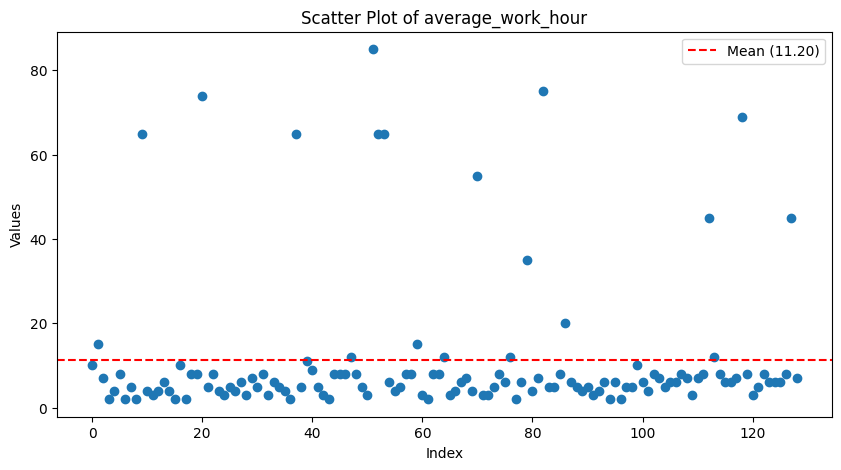

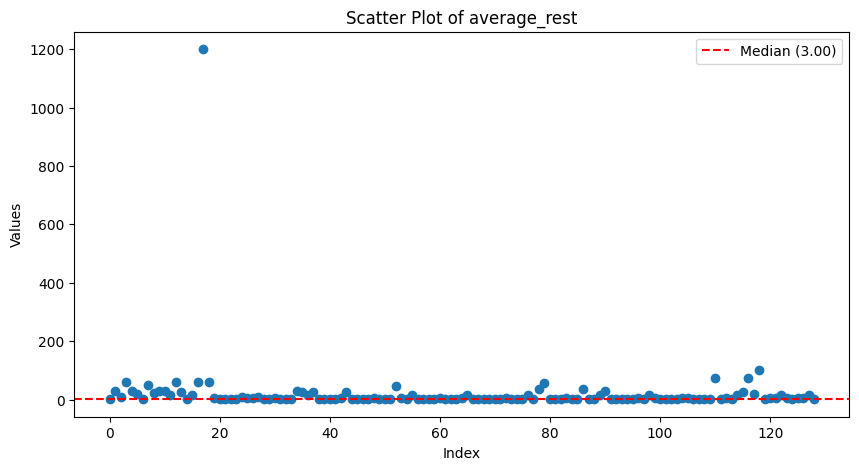

In [ ]:
scatterPlot(df['average_work_hour'])
scatterPlot(df['average_rest'], 'median')

In [ ]:
def handle_outliers(df, column_name):
    # Menghitung Q1 (25th percentile) dan Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    # Menghitung IQR (Interquartile Range)
    IQR = Q3 - Q1
    # Menentukan batas bawah dan batas atas untuk mendeteksi outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")

    # Mengganti nilai outliers dengan NaN
    df[column_name] = np.where((df[column_name] < lower_bound) | (df[column_name] > upper_bound), np.nan, df[column_name])

    # Mengganti NaN dengan median
    median = df[column_name].median()
    df[column_name].fillna(median, inplace=True)

    return df

handle_outliers(df, 'average_work_hour')
df['average_work_hour'].describe()

Lower Bound: -2.0
Upper Bound: 14.0


count    129.000000
mean       5.751938
std        2.308378
min        2.000000
25%        4.000000
50%        6.000000
75%        7.000000
max       12.000000
Name: average_work_hour, dtype: float64

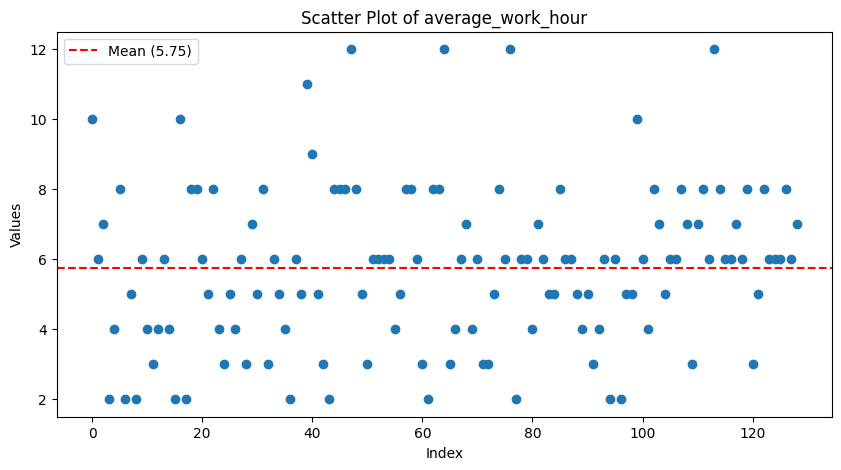

In [ ]:
scatterPlot(df['average_work_hour'])

In [ ]:
def calculate_statistic(df, column_name, statistic='mean', decimals=1):
    if statistic == 'mean':
        result = round(df[column_name].mean(), decimals)
    elif statistic == 'median':
        result = round(df[column_name].median(), decimals)
    else:
        raise ValueError("Statistic must 'mean' or 'median'")
    return result

# def modify_average_rest(x, describe):
#     if x > 3:
#         return describe
#     else:
#         return x

def modify_average_rest(x):
    if x >= 1200:
        return round((x / 1200), 1)
    elif x > 5:
        return round((x / 60), 1)
    else:
        return x


def custom_round(x):
    if x - np.floor(x) < 0.5:
        return np.floor(x)
    else:
        return np.ceil(x)

df['average_work_hour'] = df['average_work_hour'].apply(custom_round)
df['average_work_hour'] = df['average_work_hour'].astype(int)

# df['average_rest'] = df['average_rest'].apply(lambda x: modify_average_rest(x, calculate_statistic(df, 'average_rest', 'median')))
for col in df[['average_rest']]:
    df[col] = df[col].apply(modify_average_rest)

In [ ]:
df['average_work_hour'].describe()

count    129.000000
mean       5.751938
std        2.308378
min        2.000000
25%        4.000000
50%        6.000000
75%        7.000000
max       12.000000
Name: average_work_hour, dtype: float64

In [ ]:
df['average_rest'].describe()

count    129.000000
mean       1.687597
std        1.412500
min        0.100000
25%        0.800000
50%        1.000000
75%        2.000000
max        5.000000
Name: average_rest, dtype: float64

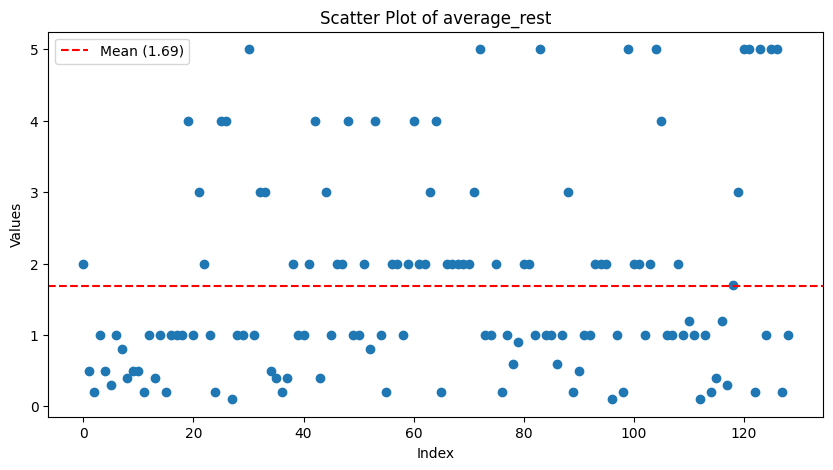

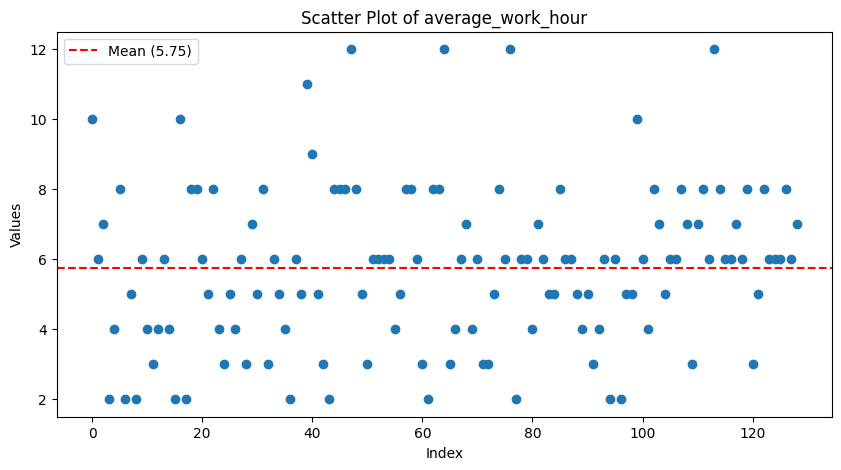

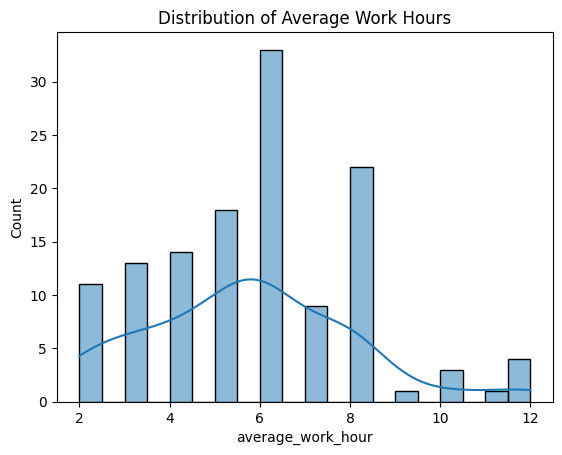

In [ ]:
scatterPlot(df['average_rest'])
scatterPlot(df['average_work_hour'], 'mean')

sns.histplot(df['average_work_hour'], bins=20, kde=True)
plt.title('Distribution of Average Work Hours')
plt.show()

## **Menjumlahkan Gangguan**

In [ ]:
print(df.columns)

Index(['gender', 'age', 'job', 'task', 'work_days', 'difficulty',
       'average_work_hour', 'average_rest', 'mood_before_work',
       'mood_after_work', 'deadline', 'importance', 'sleep_average',
       'productive_time', 'urgency', 'Gangguan dari atasan',
       'Gangguan dari internal (Kelelahan', 'Gangguan dari kesehatan',
       'Gangguan dari lingkungan sekitar (kebisingan)',
       'Gangguan dari perangkat elektronik (notifikasi dari smartphone atau komputer)',
       'Gangguan dari teman atau rekan kerja', 'Gangguan internet',
       'Gangguan jawa', 'MATI LAMPU ??', 'Mood ', 'Panggilan Telepon',
       'Temen ngajak mabar??', 'Tidak ada', 'ajakan bermain'],
      dtype='object')


In [ ]:
df['total_gangguan'] = df[['Gangguan dari atasan',
       'Gangguan dari internal (Kelelahan', 'Gangguan dari kesehatan',
       'Gangguan dari lingkungan sekitar (kebisingan)',
       'Gangguan dari perangkat elektronik (notifikasi dari smartphone atau komputer)',
       'Gangguan dari teman atau rekan kerja', 'Gangguan internet',
       'Gangguan jawa', 'MATI LAMPU ??', 'Mood ', 'Panggilan Telepon',
       'Temen ngajak mabar??', 'Tidak ada', 'ajakan bermain']].sum(axis=1)

In [ ]:
df['total_gangguan'].describe()

count    129.000000
mean       2.294574
std        1.220931
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: total_gangguan, dtype: float64

## **Kategorisasi Hari Kerja**

In [ ]:
df['work_days'].describe()

count    129.000000
mean       4.767442
std        1.417037
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: work_days, dtype: float64

In [ ]:
def categorize_days(day):
    if 1 <= day <= 3:
        return "1 - 3 hari"
    elif day == 4:
        return "2 - 4 hari"
    elif day == 5:
        return "3 - 5 hari"
    elif day == 6:
        return "4 - 6 hari"
    elif day == 7:
        return "5 - 7 hari"
    else:
        return "Unknown category"

df['work_days_category'] = [categorize_days(day) for day in df['work_days']]
df['work_days_category_int'] = df['work_days_category'].str.extract(r'(\d+)\s*hari$')
df['work_days_category_int'] = df['work_days_category_int'].astype(int)

## **Kalikan hari kerja dengan rata - rata jam kerja**

In [ ]:
df['work_hour_in_week'] = df['work_days_category_int'] * df['average_work_hour']

In [ ]:
df['work_hour_in_week'].describe()

count    129.000000
mean      28.418605
std       15.450373
min        6.000000
25%       15.000000
50%       28.000000
75%       40.000000
max       84.000000
Name: work_hour_in_week, dtype: float64

## **Kategori jam kerja dalam 1 minggu :**

1.   Paruh Waktu < 35 jam
2.   Normal 35 <= 40 jam
3.   Lembur > 40 jam



In [ ]:
def work_hour_in_week(hours):

    if hours < 35 :
      return "Paruh Waktu"
    elif 35 <= hours <= 40 :
      return "Normal"
    elif hours > 40 :
      return "Lembur"

df['categorize_work_hour_in_week'] = df['work_hour_in_week'].apply(work_hour_in_week)

In [ ]:
df['categorize_work_hour_in_week'].head()

0         Lembur
1         Lembur
2         Lembur
3    Paruh Waktu
4    Paruh Waktu
Name: categorize_work_hour_in_week, dtype: object

In [ ]:
# df.to_csv('data_gform_before_encode.csv', sep='|', index=False)
# files.download('data_gform_before_encode.csv')

## **Encode :**
1. work_days_category
2. categorize_work_hour_in_week

In [ ]:
label_encoder = LabelEncoder()

df['work_hour_label'] = label_encoder.fit_transform(df['categorize_work_hour_in_week'])
df['work_days_label'] = label_encoder.fit_transform(df['work_days_category'])

## **Menyamakan jumlah label 'productive_time'**

In [ ]:
df['productive_time'].value_counts()

productive_time
0    52
3    34
1    25
2    18
Name: count, dtype: int64

In [ ]:
# Hitung jumlah setiap label
productive_time_label = df['productive_time'].value_counts()

# Temukan jumlah label yang paling sedikit
min_jumlah = productive_time_label.min()

# Temukan jumlah label 2
jumlah_label_2 = productive_time_label[2]

# Tentukan berapa banyak baris yang perlu dihapus dari setiap label lainnya
rows_to_drop = abs(jumlah_label_2 - min_jumlah)

# Ambil baris-baris dengan label 0, 3, dan 1 untuk dihapus
rows_to_drop_label_0 = df[df['productive_time'] == 0].sample(productive_time_label[0] - 34, replace=True)
rows_to_drop_label_1 = df[df['productive_time'] == 1].sample(productive_time_label[1] - 7, replace=True)
rows_to_drop_label_3 = df[df['productive_time'] == 3].sample(productive_time_label[3] - 16, replace=True)
rows_to_drop_label_2 = df[df['productive_time'] == 2].sample(productive_time_label[2], replace=True)

# Gabungkan semua baris yang akan dihapus
rows_to_drop_all = pd.concat([rows_to_drop_label_0, rows_to_drop_label_1, rows_to_drop_label_3, rows_to_drop_label_2])

# Hapus baris-baris tersebut dari DataFrame
# df = df.drop(rows_to_drop_all.index)

In [ ]:
df = rows_to_drop_all

In [ ]:
df['productive_time'].value_counts()

productive_time
0    18
1    18
3    18
2    18
Name: count, dtype: int64

In [ ]:
df = df.drop(columns=['work_days', 'average_work_hour',  'Gangguan dari atasan',
             'Gangguan dari internal (Kelelahan', 'Gangguan dari kesehatan',
             'Gangguan dari lingkungan sekitar (kebisingan)',
             'Gangguan dari perangkat elektronik (notifikasi dari smartphone atau komputer)',
             'Gangguan dari teman atau rekan kerja', 'Gangguan internet',
             'Gangguan jawa', 'MATI LAMPU ??', 'Mood ', 'Panggilan Telepon',
             'Temen ngajak mabar??', 'Tidak ada', 'ajakan bermain', 'work_days_category',
             'work_days_category_int',
             'work_hour_in_week',
             'categorize_work_hour_in_week', 'work_days_label'])

In [ ]:
df['productive_time'].value_counts()

productive_time
0    18
1    18
3    18
2    18
Name: count, dtype: int64

## **Save to CSV**

In [ ]:
df.to_csv('data_gform_after_encode.csv', sep='|', index=False)
files.download('data_gform_after_encode.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>